In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_cleaned.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


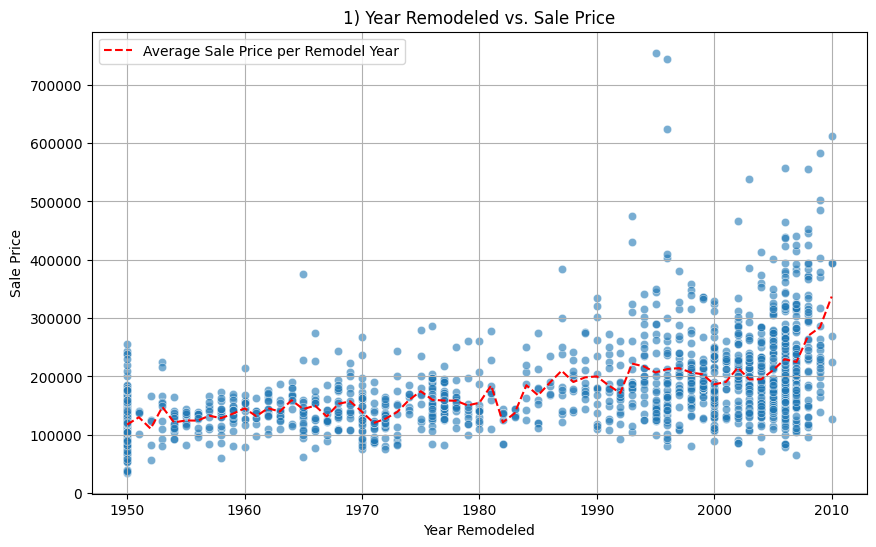

In [3]:
average_price_by_remod_year = df.groupby('YearRemodAdd')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df, alpha=0.6)
sns.lineplot(x='YearRemodAdd', y='SalePrice', data=average_price_by_remod_year, color='red', linestyle='--', label='Average Sale Price per Remodel Year')
plt.title('1) Year Remodeled vs. Sale Price')
plt.xlabel('Year Remodeled')
plt.ylabel('Sale Price')
plt.grid(True)
plt.legend()
plt.show()

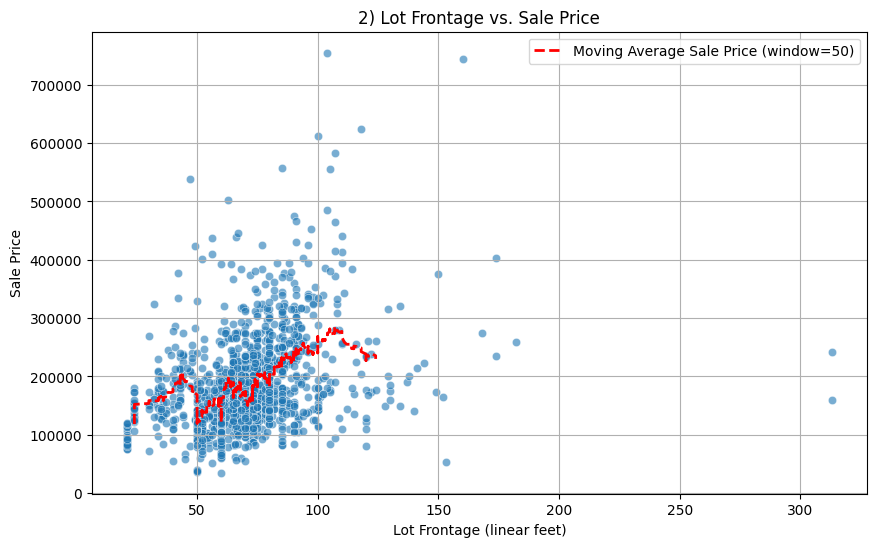

In [4]:
# Sort by LotFrontage and calculate moving average
df_sorted = df.sort_values('LotFrontage').reset_index(drop=True)
df_sorted['SalePrice_MA'] = df_sorted['SalePrice'].rolling(window=50, center=True).mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df, alpha=0.6)
plt.plot(df_sorted['LotFrontage'], df_sorted['SalePrice_MA'], color='red', linestyle='--', label='Moving Average Sale Price (window=50)', linewidth=2)
plt.title('2) Lot Frontage vs. Sale Price')
plt.xlabel('Lot Frontage (linear feet)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.legend()
plt.show()

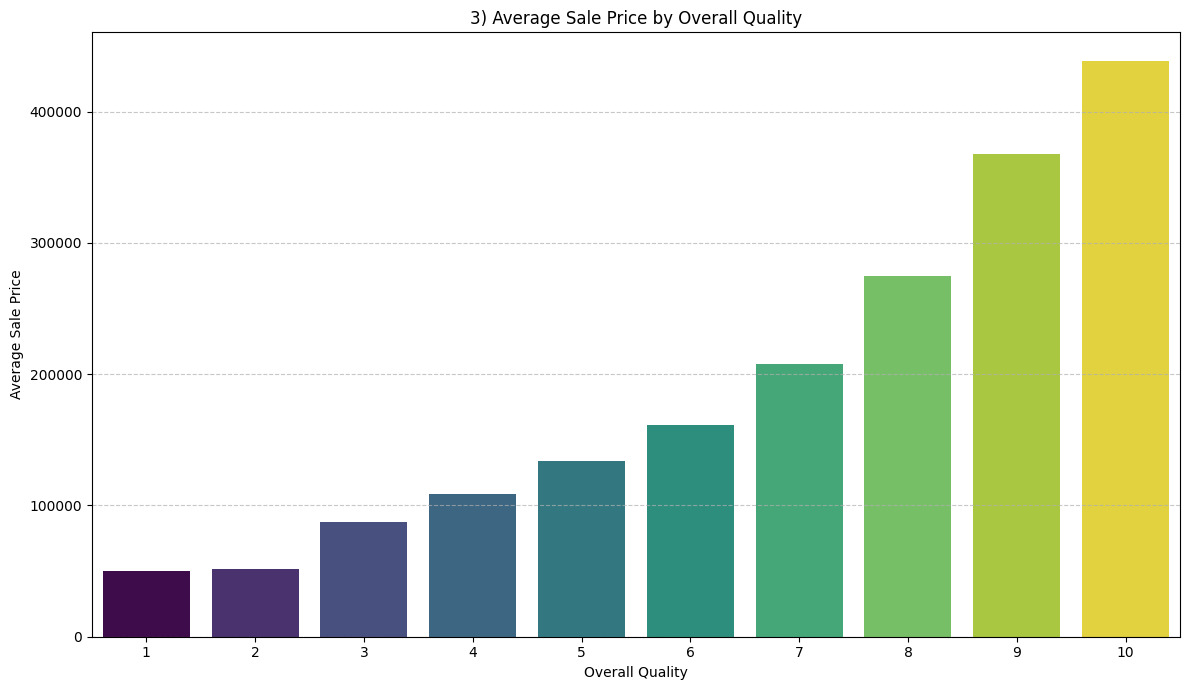

In [5]:
average_price_by_overall_qual = df.groupby('OverallQual')['SalePrice'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='OverallQual', y='SalePrice', data=average_price_by_overall_qual, hue='OverallQual', palette='viridis', legend=False)
plt.title('3) Average Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

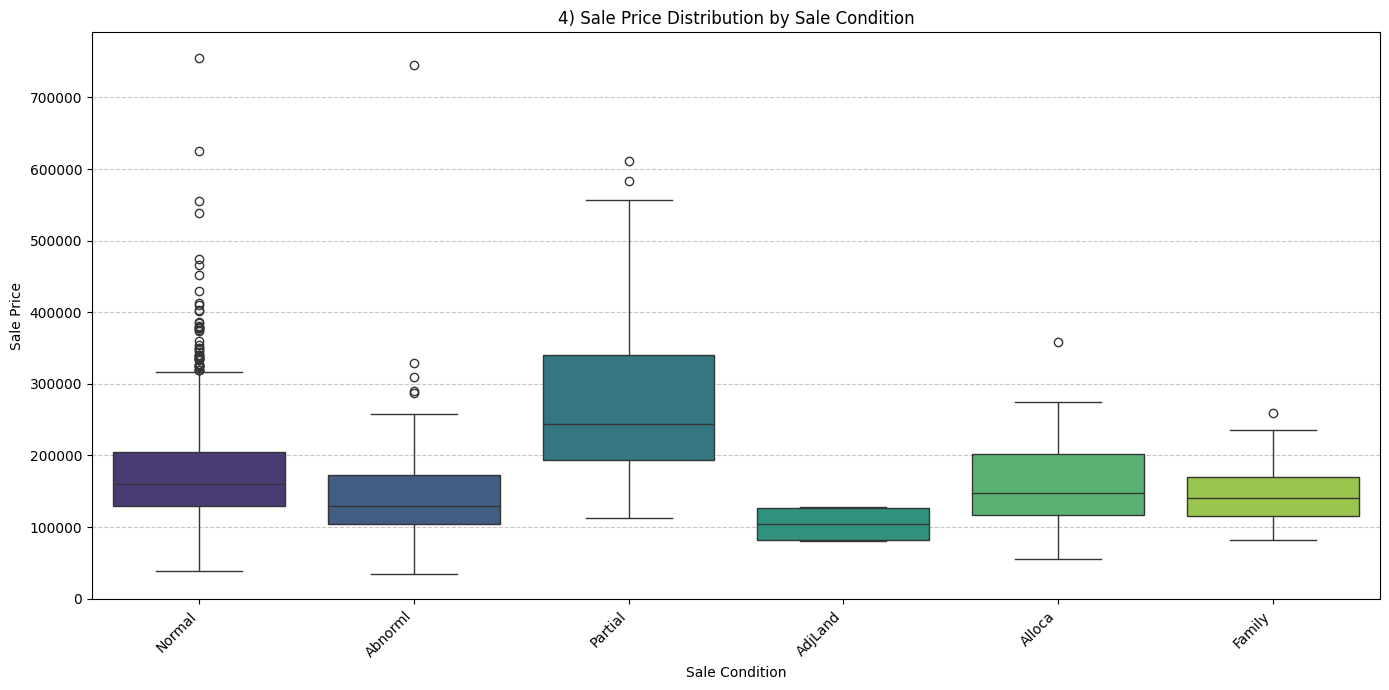

In [6]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df, hue='SaleCondition', palette='viridis', legend=False)
plt.title('4) Sale Price Distribution by Sale Condition')
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

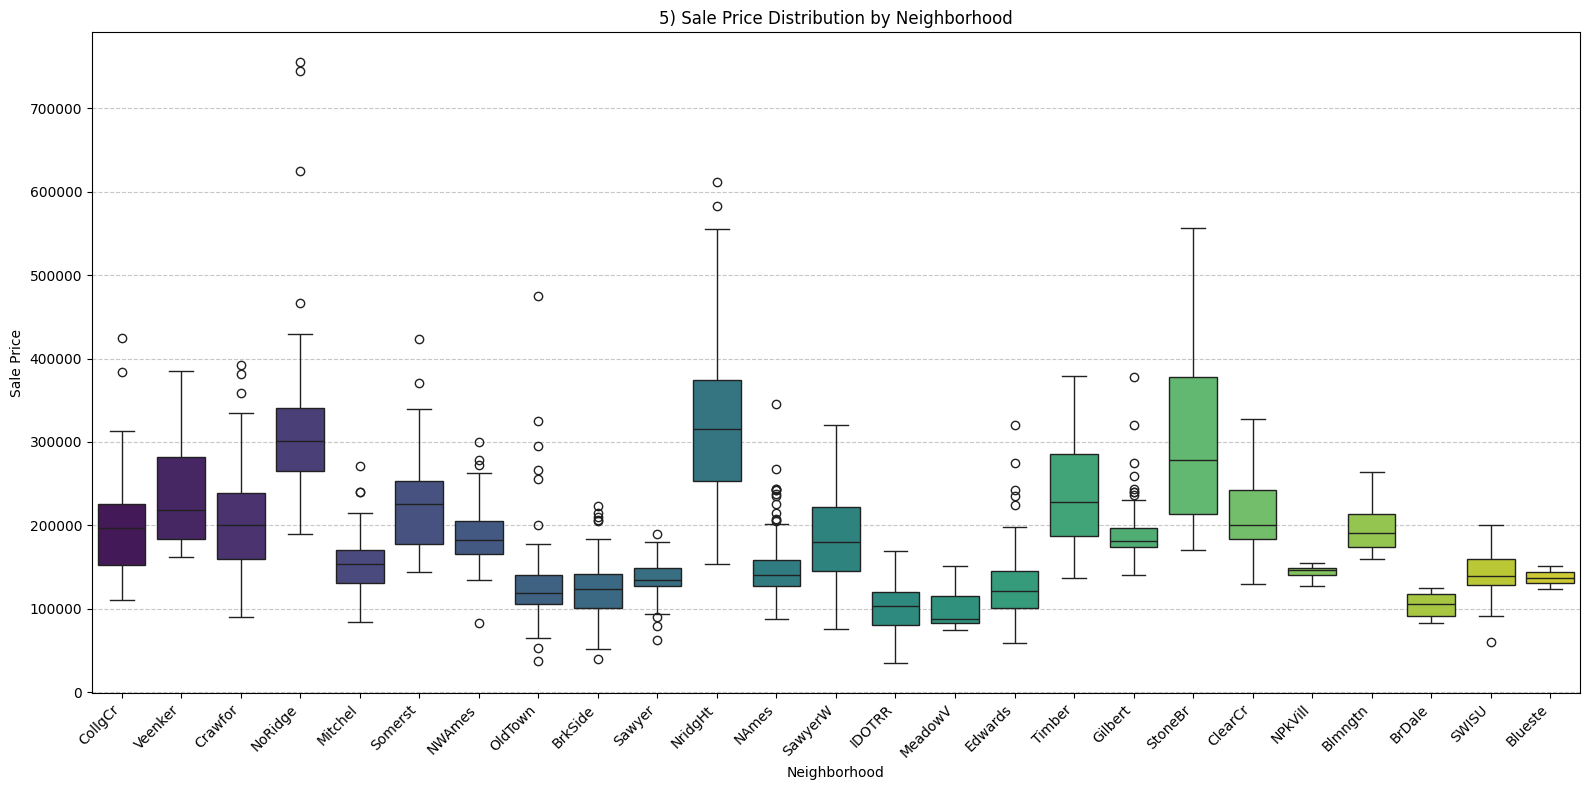

In [7]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, hue='Neighborhood', palette='viridis', legend=False)
plt.title('5) Sale Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

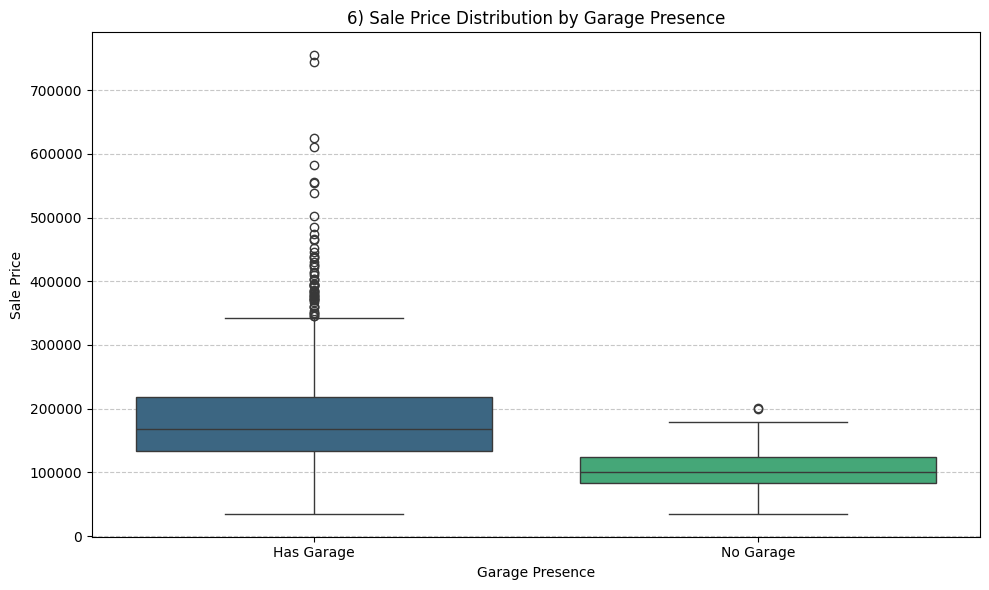

In [8]:
# Create binary variable for garage presence
df['HasGarage'] = df['GarageType'].notna().map({True: 'Has Garage', False: 'No Garage'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='HasGarage', y='SalePrice', data=df, hue='HasGarage', palette='viridis', legend=False)
plt.title('6) Sale Price Distribution by Garage Presence')
plt.xlabel('Garage Presence')
plt.ylabel('Sale Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

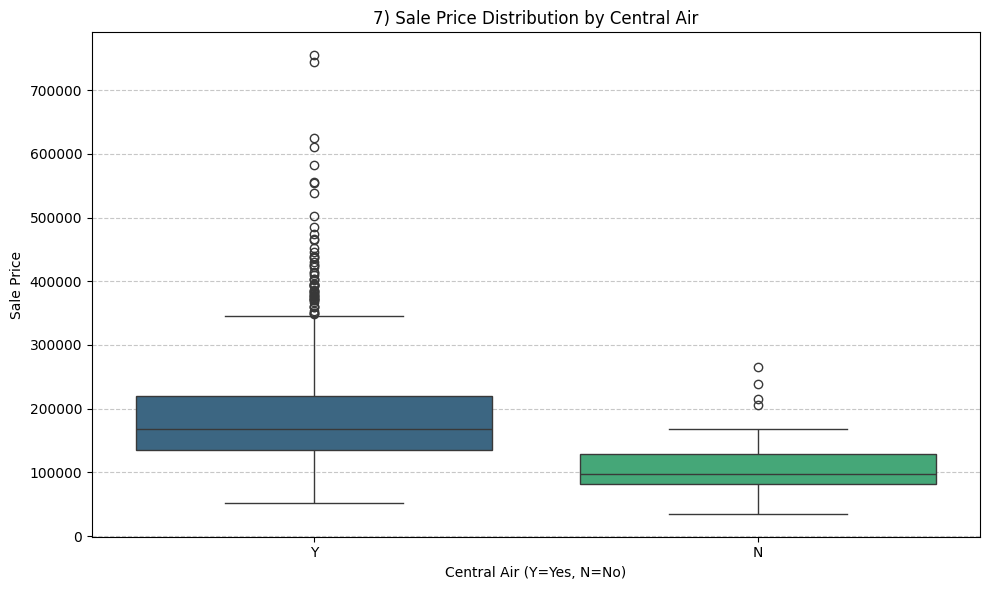

In [9]:
# Create visualization for central air
plt.figure(figsize=(10, 6))
sns.boxplot(x='CentralAir', y='SalePrice', data=df, hue='CentralAir', palette='viridis', legend=False)
plt.title('7) Sale Price Distribution by Central Air')
plt.xlabel('Central Air (Y=Yes, N=No)')
plt.ylabel('Sale Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Graph analysis

## 1) Year Remodeled vs. Sale Price
This plot compares the average sale price of a home versus the year that the house was remodeled. Looking at the earliest year that we can see, the years in the 1950's had the lowest sale price of any year. As time goes on we do notice a steady increase in the sale price of homes. There are some smaller dips here and there but generally that is what we see. There are noticeably higher outliers and spread as the time goes on as well. We will have to see what is the reason for this. As well as taking a look at the year 1980 as there is quite a larger than average drop for this time frame. The year remodeled is a numerical data type.

## 2) Lot Frontage vs. Sale Price
Looking at this plot, we see quite a difference compared to what we were looking at before. Intuitively, when you think of a house that have lots of land, you would think that the house would be more expensive. That is sort of what we are seeing here, but not to the extent that we have pictured before running the plot since there is a lot more spikes and noise. We do notice a steady increase from 25 linear feet to about 115 linear feet. The price did raise from about $100K to about $350K respectively. Onwards from that point is where we see large amounts of variation and noise. We would love to do a deeper dive to see why that is, since we were expecting a liner increase in the sale price of a home. Originally we were just running an average line, which made it quite noisy. After changing the line to a moving average, it paints a much better picture. The lot frontage is a numerical data type. 

## 3) Average Sale Price by Overall Quality
This is a plot that behaved exactly like we were expecting. As the quality of the house goes up, so does the price of the home. It also does so very linearly, and smoothly. We are wanting to dive deeper into this one by taking a look at maybe how many of each quality of house there are. This might be one of the more important findings that we have, since this is showing very heavy correlation. It seems like a lot of careful consideration goes into the quality of the home when coming up with the value of the home. The overall home quality is a categorical data type that is also numerical.  

## 4) Sale Price Distribution by Sale Condition
When creating this plot, we did not really have a plan. We were mainly interested in how sale condition would be different from home quality. After looking at this chart we just had more questions. Why would a partial home, be more expensive on average as compared to normal other sale conditions of homes. At first, I was thinking that maybe something like a condo or apartment would count as a partial buy. Since then that would mean as a whole they would catch a higher selling price. After some research, it seems like it does not work like that. From my understanding of what I saw, it would be counted if the home were bought by maybe more than one person or entity. That makes sense since if you needed to split the payment of the home between people, that home may be more expensive. We would need to do further research to ensure a better understanding of the situation here. The sale condition of homes is a categorical data type. 

## 5) Sale Price Distribution by Neighborhood
Our last plot is this one and this one was nice to see. It pretty much shows us what we wanted to see and expected to see. Different neighborhoods would certainly catch a different price on the market. We can see here that NoRidge, NridgHt, Timber, and StoneBr are neighborhoods that stand out as having homes with higher prices. These must be the nice neighborhoods that maybe could include things like gated communities. We can confirm that as we deepen our research. On the other side of the spectrum, we can see that neighborhoods like IDOTRR and MeadowV typically have the lowest selling price. These did not stand out as much as the higher priced neighborhoods, but you can see that they would be the lowest. The neighborhood of a home is of a categorical data type. 

## 6) Sale Price Distribution by Garage Presence
We wanted to see a binary data type we could have examined the yes and no variables such as "Has Central Air" or "Has Garage". This plot shows the sale price distribution for homes with and without a garage, which is an example of a binary data type. Looking at this plot, we can clearly see that homes with a garage have a noticeably higher average sale price compared to homes without a garage. Homes with garages range higher in price distribution and have fewer outliers on the lower end. This suggests that garage presence is an important feature that significantly impacts the home's value. The median price for homes with a garage appears to be substantially higher than those without, making garage presence a meaningful binary predictor of sale price. We also notice quite a few outliers in the has garage section as well. Generally we can say that if a home has a garage, the price will typically be higher than a home without one.

## 7) Sale Price Distribution by Central Air
This plot examines another binary variable: whether homes have central air conditioning. We can see that homes with central air (Y) have a considerably higher average sale price compared to homes without central air (N). The distribution for homes with central air shows higher values overall and much tighter clustering at the upper price ranges. This indicates that central air is a significant amenity that increases home value. The stark difference between the two groups suggests that central air is nearly as impactful as garage presence in determining sale price, making it another important binary feature for predicting home values. Again, there are a huge amount of outliers in the has central air section. However we can still say that the homes that have central air, will more often than not, have a higher selling price than homes without central air. Just looks at the highest priced home in each section. The highest selling home in the no central air section is about 300K whereas the highest of the homes that have central air is about 800K.